In [1]:
from IPython.display import clear_output
import gym
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
import random
import numpy as np
import torch as T
import pickle
import matplotlib.pyplot as plt

In [2]:
class Game():
    import numpy as np
    import random
    def __init__(self,playfirst = True,human_play = False):
        self.playfirst = playfirst
        self.human_play = human_play
        if self.playfirst:
            self.player_just_played = -1
        else:
            self.player_just_played = 1
        self.all_actions = dict(enumerate([(i,j) for i in range(9) for j in range(6)]))
        self.all_actions_rev = {j:i for i,j in self.all_actions.items()}
        self.game_size = (9,6)
        self.board = np.zeros((9,6))
        self.state_space =(5,379)
        self.action_space = 54
        self.zero_padding = np.zeros(379)
        
    def make_game(self,print_gameboard=False):
        self.board = np.zeros((9,6))
        if self.playfirst:
            self.player_just_played = -1
            if print_gameboard:
                self.print_game()
            state = self.convert_board()
#             padded_state = np.concatenate((np.array(list(zero_padding)*4).reshape(379,4),state.reshape(379,1)),axis=1)
            return state,self.get_available_moves()
        else:
            self.player_just_played = 1
            available_moves = self.get_available_moves()
            
#             if self.human_play:
#                 row = int(input("Enter row: "))
#                 col = int(input("enter column: "))
#                 action = [i for i,j in self.all_actions.items() if j == (row,col)][0]
#             else:
            action = self.random.choice(available_moves)
            self.board = np.zeros((9,6))
            self.play(action)
            self.change_player()
            if print_gameboard | self.human_play:
                self.print_game()
            state = self.convert_board()
#             padded_state = np.concatenate((np.array(list(zero_padding)*4).reshape(379,4),state.reshape(379,1)),axis=1)
            return state,self.get_available_moves()
       
            
    def chain(self):
        while abs(self.board).max() > 1:
            check_board = self.board.copy()
            for i in range(0,9):
                for j in range(0,6):
                    if abs(self.board[i][j]) > 1:
                        if ((i==0)&(j==0))|((i==0)&(j==5)) | ((i==8)&(j==0)) | ((i==8)&(j==5)):
                            if self.board[i][j] > 0:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1
                                if row_B in range(0,9):
                                    self.board[row_B][j] = int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1
                                if col_L in range(0,6):
                                    self.board[i][col_L] = int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1
                                if col_R in range(0,6):
                                    self.board[i][col_R] = int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1
                            else:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = -(int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1)
                                if row_B in range(0,9):
                                    self.board[row_B][j] = -(int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1)
                                if col_L in range(0,6):
                                    self.board[i][col_L] = -(int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1)
                                if col_R in range(0,6):
                                    self.board[i][col_R] = -(int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1)
                    if abs(self.board[i][j]) > 2:
                        if ((i in range(1,8))&(j==0))| ((i in range(1,8))&(j==5)) | ((i==0)&(j in range(1,5))) | ((i==8)&(j in range(1,5))):
                            if self.board[i][j] > 0:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1
                                if row_B in range(0,9):
                                    self.board[row_B][j] = int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1
                                if col_L in range(0,6):
                                    self.board[i][col_L] = int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1
                                if col_R in range(0,6):
                                    self.board[i][col_R] = int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1
                            else:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = -(int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1)
                                if row_B in range(0,9):
                                    self.board[row_B][j] = -(int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1)
                                if col_L in range(0,6):
                                    self.board[i][col_L] = -(int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1)
                                if col_R in range(0,6):
                                    self.board[i][col_R] = -(int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1)


                    if abs(self.board[i][j]) > 3:
                        if ((i in range(1,8))&(j in range(1,5))):
                            if self.board[i][j] > 0:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1
                                if row_B in range(0,9):
                                    self.board[row_B][j] = int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1
                                if col_L in range(0,6):
                                    self.board[i][col_L] = int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1
                                if col_R in range(0,6):
                                    self.board[i][col_R] = int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1
                            else:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = -(int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1)
                                if row_B in range(0,9):
                                    self.board[row_B][j] = -(int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1)
                                if col_L in range(0,6):
                                    self.board[i][col_L] = -(int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1)
                                if col_R in range(0,6):
                                    self.board[i][col_R] = -(int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1)


            if self.board.max()<=0:
                break
            elif self.board.min() >=0:
                break

            if (self.board == check_board).min() == True:
                break

    def play(self,action):
        row,col = self.all_actions[action]
        if self.player_just_played == 1:
            self.board[row][col] -= 1
            self.chain()
        else:
            self.board[row][col] += 1
            self.chain() 
        
                
    
    def check_win_tie(self):
        if self.board.max() != self.board.min():
            if self.board.max()<=0:
                return -1
            elif self.board.min()>=0:
                return 1
    
    def get_available_moves(self):
            temp_moves = []
            for i in range(0,9):
                for j in range(0,6):
                    if self.board[i][j]*self.player_just_played <= 0:
                        temp_moves.append(self.all_actions_rev[(i,j)])
            return temp_moves

    
    def print_game(self):
        print(self.board)
#         for i in range(self.game_size):
#             if i < 2:
#                 print('  ',self.symbol_match[self.board[i,0]], ' | ',self.symbol_match[self.board[i,1]],' | ',self.symbol_match[self.board[i,2]])
#                 print('-------------------')
#             else:
#                 print('  ',self.symbol_match[self.board[i,0]], ' | ',self.symbol_match[self.board[i,1]],' | ',self.symbol_match[self.board[i,2]])
                
                
    def convert_board(self):
        if self.player_just_played == 1:
            flag = 1
        elif self.player_just_played == -1:
            flag = 0
        g = self.board.reshape(54)
        base = self.np.zeros_like(g)
        first_1 = base.copy()
        first_2 = base.copy()
        first_3 = base.copy()
        second_1 = base.copy()
        second_2 = base.copy()
        second_3 = base.copy()
        zeros = base.copy()
        first_1[np.where(g==1)] = 1
        first_2[np.where(g==2)] = 1
        first_3[np.where(g==3)] = 1
        zeros[np.where(g==0)] = 1
        second_1[np.where(g==-1)] = 1
        second_2[np.where(g==-2)] = 1
        second_3[np.where(g==-3)] = 1
        return self.np.append(self.np.concatenate((first_1,first_2,first_3,second_1,second_2,second_3,zeros)),flag)
    
    def change_player(self):
        if self.player_just_played == 1:
            self.player_just_played = -1
        else:
            self.player_just_played = 1
    
    def step(self,action,print_gameboard=False):
        available_moves = self.get_available_moves()
        if action in available_moves:
            self.play(action)
            if print_gameboard | self.human_play:
                self.print_game()
        self.change_player()
        game_result = self.check_win_tie()
        if game_result == None:
            done = False
            reward = 0
        else:
            done = True
            if game_result == 1:
                reward = 1
            elif game_result ==-1:
                reward = -1
            state = self.convert_board()
        
        
        available_moves = self.get_available_moves()
        if len(available_moves) > 0:
#             if self.human_play:
#                 row = int(input("Enter row: "))
#                 col = int(input("enter column: "))
#                 action = [i for i,j in self.all_actions.items() if j == (row,col)][0]
#             else:
            action = self.random.choice(available_moves)
            
            self.play(action)
            if print_gameboard | self.human_play:
                print("env played",self.all_actions[action])
                self.print_game()
            self.change_player()

        game_result = self.check_win_tie()
        if game_result == None:
            done = False
            reward = 0
        else:
            done = True
            if game_result == 1:
                reward = 1
            elif game_result ==-1:
                reward = -1
            state = self.convert_board()
        
        state = self.convert_board()
        return state,reward,done,self.get_available_moves()

In [3]:
env = Game()

In [4]:
env.player_just_played

-1

In [5]:
# ln = []
# for i in range(1):
#     env = Game()
#     done = False
#     data = []
#     while not done:
#         print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#         action = random.choice(env.get_available_moves())
#         print("random played",env.all_actions[action])
#         state,reward,done,available_moves = env.step(action,print_gameboard=True)
#         print("player_just_played",env.player_just_played)
#         data.append((state,reward,done,available_moves))
#     ln.append(len(data))

In [21]:
class Qnet(nn.Module):
    def __init__(self,in_dims,n_actions,alpha):
        super(Qnet,self).__init__()
        self.in_dims = in_dims
        self.n_actions = n_actions
        self.fc1 = nn.Linear(5*379,512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512,256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256,256)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(256,self.n_actions)
        self.loss = nn.MSELoss() ###
        self.optimizer = optim.RMSprop(params=self.parameters(),lr=alpha)
        
    def forward(self,observation):
        state = T.FloatTensor(observation)
        x = self.relu1(self.fc1(state))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        actions = self.fc4(x)
        return actions

In [22]:
class Agent(object):
    import numpy as np
    def __init__(self,in_dims,n_actions,alpha,epsilon,gamma,batch_size,reply_mem_size,epsilon_min=0.05,epsilon_decrease=0.9996,):
        self.in_dims = in_dims
        self.action_space = [i for i in range(n_actions)]
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.batch_size = batch_size
        self.reply_mem_size = reply_mem_size
        self.mem_cntr = 0

        
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decrease = epsilon_decrease
        
        # define memories
        self.state_mem = self.np.zeros((self.reply_mem_size,379))
        self.action_mem = self.np.zeros((self.reply_mem_size))
        self.reward_mem = self.np.zeros((self.reply_mem_size))
        self.next_state_mem = self.np.zeros((self.reply_mem_size,379))
        self.is_done_mem = self.np.zeros((self.reply_mem_size))
        self.state_mem_stacked = self.np.zeros((self.reply_mem_size,5*379))
        self.next_state_mem_stacked = self.np.zeros((self.reply_mem_size,5*379))
        
        # define brain
        self.brain = Qnet(self.in_dims,self.n_actions,self.alpha)
        
        
        self.zero_padding = [self.np.zeros(379)]
        
    def store_experiance(self,state,action,reward,next_state,is_done,episode_ln = None):
        index = self.mem_cntr % self.reply_mem_size
#         self.state_mem[index] = state
        self.action_mem[index] = action
        self.reward_mem[index] = reward
#         self.next_state_mem[index] = next_state
        self.is_done_mem[index] = 1 - is_done
        self.mem_cntr += 1
        
        self.state_mem_stacked[index] = state
        self.next_state_mem_stacked[index] = next_state

        
        
    
    def act(self,observation,available_moves):
        net_act = self.brain.forward(observation)
        if  self.np.random.random() > self.epsilon:
            action = T.argmax(net_act).item()
        else:
            action = self.np.random.choice(available_moves)
        return action
            
            
    def learn(self):
        if self.mem_cntr > self.batch_size:
            self.brain.optimizer.zero_grad()
            
            max_mem = self.mem_cntr if self.mem_cntr < self.reply_mem_size else self.reply_mem_size
            
            batch = self.np.random.choice(max_mem,self.batch_size)
            
            state_batch = self.state_mem_stacked[batch]
            action_batch = self.action_mem[batch]
            reward_batch = T.Tensor(self.reward_mem[batch])
            next_state_batch = self.next_state_mem_stacked[batch]
            is_done_batch = T.Tensor(self.is_done_mem[batch])
            
            self.q_eval = self.brain.forward(state_batch)
            self.q_target = self.q_eval.clone()
            self.q_next = self.brain.forward(next_state_batch)
            
            batch_index = self.np.arange(self.batch_size)
            
            self.q_target[batch_index,action_batch] = reward_batch + self.gamma * T.max(self.q_next,dim=1)[0] * is_done_batch
            
            self.epsilon = self.epsilon * self.epsilon_decrease if self.epsilon > self.epsilon_min else self.epsilon_min
            
            loss = self.brain.loss(self.q_target,self.q_eval)
            loss.backward()
            self.brain.optimizer.step()
            
            

In [23]:
env = Game(playfirst=True)
in_dims = env.state_space
n_actions = env.action_space
print(in_dims,n_actions)

(5, 379) 54


In [24]:
alpha = 0.00003
epsilon = 1.0
gamma = 0.98
batch_size = 64
reply_mem_size = 100000
driver = Agent(in_dims,n_actions,alpha,epsilon,gamma,batch_size,reply_mem_size)

In [25]:
env.board

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [26]:
n_episodes = 10000

In [27]:
import copy
scores = []
eps_history = []
moving_avgs = []
for i in range(n_episodes):
    done = False
    observation,available_moves = env.make_game()
    score = 0
    episode_ln = 0
    five_states = driver.zero_padding*4
    while not done:
        episode_ln += 1
        five_states.append(observation)
        five_states = five_states[-5:]
        action = driver.act(np.array(five_states).reshape(5*379),available_moves)
        observation_, reward, done,available_moves = env.step(action)
        score += reward
        five_states_next = copy.copy(five_states)
        five_states_next.append(observation_)
        five_states_next = five_states_next[-5:]
        if not done:
            driver.store_experiance(np.array(five_states).reshape(5*379), action, reward, np.array(five_states_next).reshape(5*379),done)
        else:
            driver.store_experiance(np.array(five_states).reshape(5*379), action, reward, np.array(five_states_next).reshape(5*379),done,episode_ln)
        observation = observation_
    driver.learn()
    scores.append(score)
    eps_history.append(driver.epsilon)
    if i % 100 == 0:
        ma = np.mean(scores[max(0, i-100):(i+1)])
        moving_avgs.append(ma)
        print("episode :",i,"\n","avg_score :",ma,"\n","epsilon :",driver.epsilon)
#         print("episode :",i,"\n","avg_score :",scores[i],"\n","epsilon :",driver.epsilon)

episode : 0 
 avg_score : 1.0 
 epsilon : 1.0
episode : 100 
 avg_score : 0.1485148514851485 
 epsilon : 0.9607817508172768
episode : 200 
 avg_score : -0.10891089108910891 
 epsilon : 0.9231015727035117
episode : 300 
 avg_score : -0.26732673267326734 
 epsilon : 0.8868991452042617
episode : 400 
 avg_score : -0.04950495049504951 
 epsilon : 0.8521165135276967
episode : 500 
 avg_score : -0.12871287128712872 
 epsilon : 0.8186979957674545
episode : 600 
 avg_score : -0.009900990099009901 
 epsilon : 0.7865900937640501
episode : 700 
 avg_score : -0.04950495049504951 
 epsilon : 0.7557414074621497
episode : 800 
 avg_score : -0.10891089108910891 
 epsilon : 0.7261025526265977
episode : 900 
 avg_score : 0.009900990099009901 
 epsilon : 0.6976260817854765
episode : 1000 
 avg_score : -0.18811881188118812 
 epsilon : 0.6702664082736469
episode : 1100 
 avg_score : -0.04950495049504951 
 epsilon : 0.6439797332551617
episode : 1200 
 avg_score : -0.10891089108910891 
 epsilon : 0.618723975

KeyboardInterrupt: 

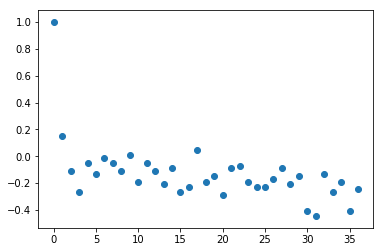

In [28]:
plt.scatter(np.arange(0,len(moving_avgs)),moving_avgs)

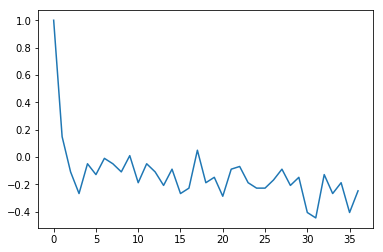

In [29]:
plt.plot(moving_avgs)

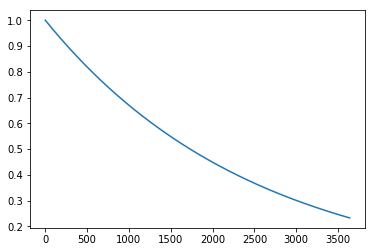

In [30]:
plt.plot(eps_history)

## DQN Vs Random

In [31]:
winners = []
driver.epsilon = 0.001
env = Game(playfirst=True,human_play=False)
n_plays = 10
for i in range(n_plays):
    print("******************************** play",i," *********************************")
    done = False
    observation,available_moves = env.make_game(print_gameboard=True)
    score = 0
    episode_ln = 0
    five_states = driver.zero_padding*4
    while not done:
        print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
        episode_ln += 1
        five_states.append(observation)
        five_states = five_states[-5:]
        action = driver.act(np.array(five_states).reshape(5*379),available_moves)
        print("NN acted ",action)
        observation_, reward, done,available_moves = env.step(action,print_gameboard=True)
        observation = observation_
    if reward == -1:
        print("LOST")
    if reward == 1:
        print("WON")
    if reward == 0:
        print("Tie")
    winners.append(reward)

******************************** play 0  *********************************
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  13
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
env played (5, 1)
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  11
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 

 [ 0.  0.  1.  0.  2.  0.]]
env played (5, 5)
[[ 1.  0.  1.  0.  1.  0.]
 [ 0.  2.  0. -1. -1.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 0. -1.  0.  0. -1.  0.]
 [-1. -2.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  1. -1.]
 [ 0. -1.  0.  2.  0.  1.]
 [ 0.  0.  1.  0.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  46
[[ 1.  0.  1.  0.  1.  0.]
 [ 0.  2.  0. -1. -1.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 0. -1.  0.  0. -1.  0.]
 [-1. -2.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  1. -1.]
 [ 0. -1.  0.  2.  1.  1.]
 [ 0.  0.  1.  0.  2.  0.]]
env played (0, 3)
[[ 1.  0.  1. -1.  1.  0.]
 [ 0.  2.  0. -1. -1.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 0. -1.  0.  0. -1.  0.]
 [-1. -2.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  1. -1.]
 [ 0. -1.  0.  2.  1.  1.]
 [ 0.  0.  1.  0.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  20
env played (4, 4)
[[ 1.  0.  1

 [-1. -1.  1.  2.  1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  9
env played (4, 4)
[[ 1.  0.  1. -2.  1. -1.]
 [ 0.  3.  0. -1. -1.  1.]
 [ 1.  1.  0. -1.  0.  0.]
 [ 0.  0. -3. -1.  0.  0.]
 [ 0. -1.  0.  0. -3. -2.]
 [-1. -2.  2. -1.  1.  2.]
 [-1. -2.  0.  1.  1.  1.]
 [-1.  0. -1.  3.  3.  1.]
 [-1. -1.  1.  2.  1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  9
env played (3, 0)
[[ 1.  0.  1. -2.  1. -1.]
 [ 0.  3.  0. -1. -1.  1.]
 [ 1.  1.  0. -1.  0.  0.]
 [-1.  0. -3. -1.  0.  0.]
 [ 0. -1.  0.  0. -3. -2.]
 [-1. -2.  2. -1.  1.  2.]
 [-1. -2.  0.  1.  1.  1.]
 [-1.  0. -1.  3.  3.  1.]
 [-1. -1.  1.  2.  1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  7
[[ 1.  1.  1. -2.  1. -1.]
 [ 1.  0.  1. -1. -1.  1.]
 [ 1.  2.  0. -1.  0.  0.]
 [-1.  0. -3. -1.  0.  0.]
 [ 0. -1.  0.  0. -3. -2.]
 [-1. -2.  2. -1.  1.  2.]
 [-1. -2.  0.  1.  1.  1.]
 

 [-1. -1.  1.  2.  1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  30
[[ 1.  1.  1. -2. -2.  0.]
 [ 1.  0.  1. -1. -1. -2.]
 [ 1.  2. -1. -1. -2. -2.]
 [-1. -2.  0. -3.  0. -2.]
 [ 2.  2.  2. -3. -2.  0.]
 [ 2.  2.  0.  2. -2. -2.]
 [ 2.  0.  2. -2. -3. -1.]
 [ 1.  2. -2.  3.  3. -2.]
 [ 0.  2.  1.  2.  1.  0.]]
env played (5, 4)
[[ 1.  1.  1. -2. -2.  0.]
 [ 1.  0.  1. -1. -1. -2.]
 [ 1.  2. -1. -1. -2. -2.]
 [-1. -2.  0. -3.  0. -2.]
 [ 2.  2.  2. -3. -2.  0.]
 [ 2.  2.  0.  2. -3. -2.]
 [ 2.  0.  2. -2. -3. -1.]
 [ 1.  2. -2.  3.  3. -2.]
 [ 0.  2.  1.  2.  1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  29
[[ 1.  1.  1. -2. -2.  0.]
 [ 1.  0.  1. -1. -1. -2.]
 [ 1.  2. -1. -1. -2. -2.]
 [-1. -2.  0. -3.  0. -2.]
 [ 2.  2.  2. -3. -2.  1.]
 [ 2.  2.  0.  2. -3. -2.]
 [ 2.  0.  2. -2. -3. -1.]
 [ 1.  2. -2.  3.  3. -2.]
 [ 0.  2.  1.  2.  1.  0.]]
env played (3, 3)
[[ 1.  1.  1. -2. -2.  0.]
 [ 

 [ 0.  0.  0.  1.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  31
[[ 0. -1.  0.  1. -1.  1.]
 [ 1. -1.  0.  0.  1. -1.]
 [ 0.  2. -1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 2.  1. -2. -2.  0. -1.]
 [ 0.  0.  0.  0.  2.  0.]
 [-1.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]]
env played (5, 5)
[[ 0. -1.  0.  1. -1.  1.]
 [ 1. -1.  0.  0.  1. -1.]
 [ 0.  2. -1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 2.  1. -2. -2.  0. -2.]
 [ 0.  0.  0.  0.  2.  0.]
 [-1.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  31
[[ 0. -1.  0.  1. -1.  1.]
 [ 1. -1.  0.  0.  1. -1.]
 [ 0.  2. -1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 2.  2. -2. -2.  0. -2.]
 [ 0.  0.  0.  0.  2.  0.]
 [-1.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]]
env played (1, 5)
[[ 0. -1.  0.  1. -1.  1.]
 [ 

 [ 0.  0.  0.  2.  0.  0.]]
env played (5, 4)
[[-1.  2.  1.  2. -1.  1.]
 [ 2. -1.  1.  0.  1. -2.]
 [ 0.  2. -2.  0. -1. -1.]
 [ 1.  0.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  0.  0.]
 [-1.  3.  3. -2. -2. -2.]
 [ 1.  1.  0.  0.  3.  0.]
 [-1. -2. -1.  0.  1.  0.]
 [ 0.  0.  0.  2.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  6
[[ 1.  0.  2.  2. -1.  1.]
 [ 1.  3.  1.  0.  1. -2.]
 [ 1.  2. -2.  0. -1. -1.]
 [ 1.  0.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  0.  0.]
 [-1.  3.  3. -2. -2. -2.]
 [ 1.  1.  0.  0.  3.  0.]
 [-1. -2. -1.  0.  1.  0.]
 [ 0.  0.  0.  2.  0.  0.]]
env played (6, 3)
[[ 1.  0.  2.  2. -1.  1.]
 [ 1.  3.  1.  0.  1. -2.]
 [ 1.  2. -2.  0. -1. -1.]
 [ 1.  0.  1. -1. -1. -1.]
 [ 1.  1. -1. -1.  0.  0.]
 [-1.  3.  3. -2. -2. -2.]
 [ 1.  1.  0. -1.  3.  0.]
 [-1. -2. -1.  0.  1.  0.]
 [ 0.  0.  0.  2.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  53
[[ 1.  0.  2.  2. -1.  1.]
 [ 1

 [-1.  1.  0.  1.  2.  0.]]
env played (4, 2)
[[ 1.  1.  2.  2. -1.  1.]
 [ 2.  1.  2.  0.  1. -2.]
 [ 2. -1.  3. -1. -2. -1.]
 [ 1.  2.  1. -2. -1. -2.]
 [ 1.  1. -2. -2.  0. -1.]
 [-1.  3.  3. -3. -3.  0.]
 [ 1.  1.  0. -2.  3. -1.]
 [-1. -3.  3.  3.  2.  2.]
 [-1.  1.  0.  1.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  51
[[ 1.  1.  2.  2. -1.  1.]
 [ 2.  1.  2.  0.  1. -2.]
 [ 2. -1.  3. -1. -2. -1.]
 [ 1.  2.  1. -2. -1. -2.]
 [ 1.  1. -2. -2.  0. -1.]
 [-1.  3.  3. -3. -3.  0.]
 [ 1.  1.  0. -2.  3. -1.]
 [-1. -3.  3.  3.  2.  2.]
 [-1.  1.  0.  2.  2.  0.]]
env played (5, 3)
[[ 1.  1.  2.  2. -1.  1.]
 [ 2.  1.  2.  0.  1. -2.]
 [ 2. -1.  3. -1. -2. -1.]
 [ 1.  2.  1. -2. -1. -2.]
 [ 1. -2. -3. -3. -1. -1.]
 [-2.  0. -1. -3. -1. -2.]
 [ 1. -3. -3. -1. -3.  0.]
 [-2.  0. -1. -3. -2. -2.]
 [-1. -2. -2. -1. -1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  51
env played (8, 4)
[[ 1.  1.  2

 [ 0.  0.  0.  2.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  31
[[ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.]]
env played (4, 0)
[[ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  51
[[ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.]]
env played (0, 4)
[[ 0.  0. -1.  0. -1.  0.]
 [ 

 [ 1.  0.  1.  1.  2. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  51
[[ 1.  1. -2. -1. -1.  0.]
 [-2.  0.  1. -1. -1.  0.]
 [-2. -2.  1.  0.  0. -2.]
 [ 0. -3. -1.  1. -1.  0.]
 [-2.  2.  1.  0. -1. -1.]
 [ 1.  2. -1. -1. -1.  0.]
 [ 1. -2.  0.  0.  0.  0.]
 [ 0.  3.  3.  3. -1. -2.]
 [ 1.  0.  1.  2.  2. -1.]]
env played (2, 3)
[[ 1.  1. -2. -1. -1.  0.]
 [-2.  0.  1. -1. -1.  0.]
 [-2. -2.  1. -1.  0. -2.]
 [ 0. -3. -1.  1. -1.  0.]
 [-2.  2.  1.  0. -1. -1.]
 [ 1.  2. -1. -1. -1.  0.]
 [ 1. -2.  0.  0.  0.  0.]
 [ 0.  3.  3.  3. -1. -2.]
 [ 1.  0.  1.  2.  2. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  12
env played (5, 5)
[[ 1.  1. -2. -1. -1.  0.]
 [-2.  0.  1. -1. -1.  0.]
 [-2. -2.  1. -1.  0. -2.]
 [ 0. -3. -1.  1. -1.  0.]
 [-2.  2.  1.  0. -1. -1.]
 [ 1.  2. -1. -1. -1. -1.]
 [ 1. -2.  0.  0.  0.  0.]
 [ 0.  3.  3.  3. -1. -2.]
 [ 1.  0.  1.  2.  2. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

 [-2.  0. -1. -2. -2.  0.]]
LOST
******************************** play 3  *********************************
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  13
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
env played (8, 5)
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  12
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0. 

 [ 0.  0.  0.  0. -1. -1.]]
env played (3, 5)
[[ 0.  0.  0. -1.  2.  0.]
 [ 1.  2.  0.  0.  0.  0.]
 [ 1.  0.  2. -1.  0. -1.]
 [ 1.  2.  1.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  1.]
 [-2.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1.  1.  0. -1. -1.  0.]
 [ 0.  0.  0.  0. -1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  43
[[ 0.  0.  0. -1.  2.  0.]
 [ 1.  2.  0.  0.  0.  0.]
 [ 1.  0.  2. -1.  0. -1.]
 [ 1.  2.  1.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  1.]
 [-2.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1.  2.  0. -1. -1.  0.]
 [ 0.  0.  0.  0. -1. -1.]]
env played (2, 4)
[[ 0.  0.  0. -1.  2.  0.]
 [ 1.  2.  0.  0.  0.  0.]
 [ 1.  0.  2. -1. -1. -1.]
 [ 1.  2.  1.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  1.]
 [-2.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1.  2.  0. -1. -1.  0.]
 [ 0.  0.  0.  0. -1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  43
[[ 0.  0.  0. -1.  2.  0.]
 [ 

 [ 1.  2. -1. -2.  0. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  2
[[ 0.  1.  2.  2.  2. -1.]
 [ 2.  3.  1.  0.  2.  1.]
 [ 1.  1.  2.  3.  1.  2.]
 [ 1.  2.  1.  2.  2.  1.]
 [-2. -2. -1.  2.  2.  1.]
 [-2. -2.  2. -1.  1.  2.]
 [ 2.  2. -1.  3.  2.  1.]
 [ 0.  3.  2. -1. -2. -1.]
 [ 1.  2. -1. -2.  0. -1.]]
env played (8, 4)
[[ 0.  1.  2.  2.  2. -1.]
 [ 2.  3.  1.  0.  2.  1.]
 [ 1.  1.  2.  3.  1.  2.]
 [ 1.  2.  1.  2.  2.  1.]
 [-2. -2. -1.  2.  2.  1.]
 [-2. -2.  2. -1.  1.  2.]
 [ 2.  2. -1.  3.  2.  1.]
 [ 0.  3.  2. -1. -2. -1.]
 [ 1.  2. -1. -2. -1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  52
env played (0, 0)
[[-1.  1.  2.  2.  2. -1.]
 [ 2.  3.  1.  0.  2.  1.]
 [ 1.  1.  2.  3.  1.  2.]
 [ 1.  2.  1.  2.  2.  1.]
 [-2. -2. -1.  2.  2.  1.]
 [-2. -2.  2. -1.  1.  2.]
 [ 2.  2. -1.  3.  2.  1.]
 [ 0.  3.  2. -1. -2. -1.]
 [ 1.  2. -1. -2. -1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

 [ 0. -2. -1. -1.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  20
[[ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0.  2.  0. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0. -2. -1. -1.  0.  0.]]
env played (0, 0)
[[-1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0.  2.  0. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0. -2. -1. -1.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  20
[[-1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0.  3.  0. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0. -2. -1. -1.  0.  0.]]
env played (4, 3)
[[-1.  0.  0. -1.  0.  0.]
 [ 

 [ 0. -2. -1. -1.  0. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  44
[[ 0. -2.  0. -2.  0.  0.]
 [-1.  1.  0. -1. -2.  1.]
 [ 2.  0.  2.  0.  0. -1.]
 [-1.  2.  2.  1. -1. -2.]
 [ 0.  1.  0.  2.  0.  0.]
 [ 0. -1.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  1.  1.  3.  0.]
 [ 0. -2. -1. -1.  0. -1.]]
env played (2, 3)
[[ 0. -2.  0. -2.  0.  0.]
 [-1.  1.  0. -1. -2.  1.]
 [ 2.  0.  2. -1.  0. -1.]
 [-1.  2.  2.  1. -1. -2.]
 [ 0.  1.  0.  2.  0.  0.]
 [ 0. -1.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  1.  1.  3.  0.]
 [ 0. -2. -1. -1.  0. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  46
[[ 0. -2.  0. -2.  0.  0.]
 [-1.  1.  0. -1. -2.  1.]
 [ 2.  0.  2. -1.  0. -1.]
 [-1.  2.  2.  1. -1. -2.]
 [ 0.  1.  0.  2.  0.  0.]
 [ 0. -1.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.]
 [ 0.  0.  1.  2.  0.  1.]
 [ 0. -2. -1. -1.  1. -1.]]
env played (0, 5)
[[ 0. -2.  0. -2.  0. -1.]
 [-

 [-1.  0. -2. -1.  1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  2
[[ 0. -2.  1. -2. -2.  0.]
 [ 2.  3.  1.  2. -3. -2.]
 [ 2.  2.  2.  0.  1. -2.]
 [ 0.  2.  0.  3. -2. -2.]
 [ 1.  2.  2.  2.  0.  0.]
 [ 0. -2.  1. -1.  0.  0.]
 [-1.  0.  0.  0.  1. -2.]
 [-1. -1.  2.  2.  3.  1.]
 [-1.  0. -2. -1.  1. -1.]]
env played (3, 2)
[[ 0. -2.  1. -2. -2.  0.]
 [ 2.  3.  1.  2. -3. -2.]
 [ 2.  2.  2.  0.  1. -2.]
 [ 0.  2. -1.  3. -2. -2.]
 [ 1.  2.  2.  2.  0.  0.]
 [ 0. -2.  1. -1.  0.  0.]
 [-1.  0.  0.  0.  1. -2.]
 [-1. -1.  2.  2.  3.  1.]
 [-1.  0. -2. -1.  1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  7
[[ 0.  1.  2. -2. -2.  0.]
 [ 2.  3.  2.  2. -3. -2.]
 [ 1.  0.  3.  0.  1. -2.]
 [ 1.  3. -1.  3. -2. -2.]
 [ 1.  2.  2.  2.  0.  0.]
 [ 0. -2.  1. -1.  0.  0.]
 [-1.  0.  0.  0.  1. -2.]
 [-1. -1.  2.  2.  3.  1.]
 [-1.  0. -2. -1.  1. -1.]]
env played (8, 1)
[[ 0.  1.  2. -2. -2.  0.]
 [ 2.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  20
[[ 0.  0. -1.  0. -1.  0.]
 [ 0.  0. -1.  0.  0. -2.]
 [ 2.  1.  0.  0. -1.  0.]
 [ 0.  0.  2.  0.  0.  0.]
 [-1.  1. -1.  0. -1.  0.]
 [ 1.  0.  1.  0.  0.  0.]
 [ 0.  2.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  2.  0.  0.]]
env played (1, 3)
[[ 0.  0. -1.  0. -1.  0.]
 [ 0.  0. -1. -1.  0. -2.]
 [ 2.  1.  0.  0. -1.  0.]
 [ 0.  0.  2.  0.  0.  0.]
 [-1.  1. -1.  0. -1.  0.]
 [ 1.  0.  1.  0.  0.  0.]
 [ 0.  2.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  2.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  52
[[ 0.  0. -1.  0. -1.  0.]
 [ 0.  0. -1. -1.  0. -2.]
 [ 2.  1.  0.  0. -1.  0.]
 [ 0.  0.  2.  0.  0.  0.]
 [-1.  1. -1.  0. -1.  0.]
 [ 1.  0.  1.  0.  0.  0.]
 [ 0.  2.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  2.  1.  0.]]
env played (1, 5)
[[ 0.  0. -1.  0. -1. -1.]
 [ 0.  0. -1. -1. -1.  0.]
 [ 2

 [ 0. -1.  1.  0.  2. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  13
[[ 0.  2.  1.  2.  1.  0.]
 [ 2.  1.  2.  3.  2.  1.]
 [-1.  3.  1.  0. -3. -2.]
 [ 2.  1.  2. -1.  0.  0.]
 [-1.  1. -1.  0. -1.  0.]
 [ 1.  0.  1.  0. -1.  0.]
 [ 0.  2.  0.  0. -1.  0.]
 [ 0.  0.  0.  1.  2.  0.]
 [ 0. -1.  1.  0.  2. -1.]]
env played (7, 0)
[[ 0.  2.  1.  2.  1.  0.]
 [ 2.  1.  2.  3.  2.  1.]
 [-1.  3.  1.  0. -3. -2.]
 [ 2.  1.  2. -1.  0.  0.]
 [-1.  1. -1.  0. -1.  0.]
 [ 1.  0.  1.  0. -1.  0.]
 [ 0.  2.  0.  0. -1.  0.]
 [-1.  0.  0.  1.  2.  0.]
 [ 0. -1.  1.  0.  2. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  46
[[ 0.  2.  1.  2.  1.  0.]
 [ 2.  1.  2.  3.  2.  1.]
 [-1.  3.  1.  0. -3. -2.]
 [ 2.  1.  2. -1.  0.  0.]
 [-1.  1. -1.  0. -1.  0.]
 [ 1.  0.  1.  0. -1.  0.]
 [ 0.  2.  0.  0. -1.  0.]
 [-1.  0.  0.  1.  3.  0.]
 [ 0. -1.  1.  0.  2. -1.]]
env played (3, 5)
[[ 0.  2.  1.  2.  1.  0.]
 [ 

 [ 1.  2. -2.  1.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  46
[[ 0.  2.  1.  2.  1. -1.]
 [ 2.  1.  2.  3.  2.  1.]
 [-1.  3.  1.  0. -3. -2.]
 [ 2.  1.  2. -1. -1. -1.]
 [ 2.  1. -2.  0. -2.  0.]
 [ 1.  3.  1.  0. -2. -1.]
 [ 2.  2.  2.  0.  3.  1.]
 [ 1.  0.  2.  3.  2. -1.]
 [ 1.  2. -2.  1.  2.  1.]]
env played (4, 3)
[[ 0.  2.  1.  2.  1. -1.]
 [ 2.  1.  2.  3.  2.  1.]
 [-1.  3.  1.  0. -3. -2.]
 [ 2.  1.  2. -1. -1. -1.]
 [ 2.  1. -2. -1. -2.  0.]
 [ 1.  3.  1.  0. -2. -1.]
 [ 2.  2.  2.  0.  3.  1.]
 [ 1.  0.  2.  3.  2. -1.]
 [ 1.  2. -2.  1.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  36
[[ 0.  2.  1.  2.  1. -1.]
 [ 2.  1.  2.  3.  2.  1.]
 [-1.  3.  1.  0. -3. -2.]
 [ 2.  1.  2. -1. -1. -1.]
 [ 2.  1. -2. -1. -2.  0.]
 [ 2.  3.  1.  0. -2. -1.]
 [ 0.  3.  2.  0.  3.  1.]
 [ 2.  0.  2.  3.  2. -1.]
 [ 1.  2. -2.  1.  2.  1.]]
env played (0, 0)
[[-1.  2.  1.  2.  1. -1.]
 [ 

 [ 0.  0.  0.  0.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  12
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
env played (0, 5)
[[ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  46
[[ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
env played (0, 3)
[[ 0.  0.  0. -1.  0. -1.]
 [ 

 [ 0.  0.  0.  1.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  31
[[ 0.  2. -1. -1. -1. -1.]
 [ 2.  1.  0.  0. -1.  1.]
 [ 0.  3.  1.  0.  0.  0.]
 [ 1.  1. -1. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  2. -1. -1.  1.  0.]
 [ 0. -1.  0. -1.  0. -2.]
 [-1.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]]
env played (8, 1)
[[ 0.  2. -1. -1. -1. -1.]
 [ 2.  1.  0.  0. -1.  1.]
 [ 0.  3.  1.  0.  0.  0.]
 [ 1.  1. -1. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  2. -1. -1.  1.  0.]
 [ 0. -1.  0. -1.  0. -2.]
 [-1.  0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  46
[[ 0.  2. -1. -1. -1. -1.]
 [ 2.  1.  0.  0. -1.  1.]
 [ 0.  3.  1.  0.  0.  0.]
 [ 1.  1. -1. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  2. -1. -1.  1.  0.]
 [ 0. -1.  0. -1.  0. -2.]
 [-1.  0. -1.  0.  2.  0.]
 [ 0. -1.  0.  1.  0.  0.]]
env played (2, 0)
[[ 0.  2. -1. -1. -1. -1.]
 [ 

 [ 0. -2. -1.  1. -1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  12
env played (7, 3)
[[ 0. -2.  0. -2. -1. -1.]
 [-1. -3. -2.  0. -1.  1.]
 [-2.  3.  1.  0.  0.  0.]
 [ 1.  1. -1. -1. -1.  0.]
 [-1.  1.  0.  0. -1. -1.]
 [ 1.  3.  2. -1.  1. -1.]
 [-1.  2. -2. -2. -1. -1.]
 [-2.  0. -1. -1.  2. -1.]
 [ 0. -2. -1.  1. -1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  19
[[ 0. -2.  0. -2. -1. -1.]
 [-1. -3. -2.  0. -1.  1.]
 [-2.  3.  1.  0.  0.  0.]
 [ 1.  2. -1. -1. -1.  0.]
 [-1.  1.  0.  0. -1. -1.]
 [ 1.  3.  2. -1.  1. -1.]
 [-1.  2. -2. -2. -1. -1.]
 [-2.  0. -1. -1.  2. -1.]
 [ 0. -2. -1.  1. -1.  0.]]
env played (2, 0)
[[ 0. -1. -1. -2. -1. -1.]
 [-1. -2. -3.  0. -1.  1.]
 [-2. -1. -2.  0.  0.  0.]
 [-2. -3. -1. -1. -1.  0.]
 [-1.  1.  0.  0. -1. -1.]
 [ 1.  3.  2. -1.  1. -1.]
 [-1.  2. -2. -2. -1. -1.]
 [-2.  0. -1. -1.  2. -1.]
 [ 0. -2. -1.  1. -1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

 [-1. -1.  0. -2. -1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  19
env played (8, 0)
[[-1. -2. -2. -2. -1. -1.]
 [-2.  0. -2. -1. -2.  1.]
 [-2. -2.  0. -2. -1.  0.]
 [-2. -3. -2. -2. -2.  0.]
 [-2. -2. -1. -2. -1. -1.]
 [ 0. -2.  0. -2. -2. -1.]
 [-2. -2. -1. -1. -3. -2.]
 [-1. -3. -2. -3.  2. -1.]
 [-1. -1. -2. -2. -1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  30
[[-1. -2. -2. -2. -1. -1.]
 [-2.  0. -2. -1. -2.  1.]
 [-2. -2.  0. -2. -1.  0.]
 [-2. -3. -2. -2. -2.  0.]
 [-2. -2. -1. -2. -1. -1.]
 [ 1. -2.  0. -2. -2. -1.]
 [-2. -2. -1. -1. -3. -2.]
 [-1. -3. -2. -3.  2. -1.]
 [-1. -1. -2. -2. -1. -1.]]
env played (6, 0)
[[-1. -2. -2. -2. -1. -1.]
 [-2.  0. -2. -1. -2.  1.]
 [-2. -2.  0. -2. -1.  0.]
 [-2. -3. -2. -2. -2.  0.]
 [-2. -2. -1. -2. -1. -1.]
 [-2. -2.  0. -2. -2. -1.]
 [ 0. -3. -1. -1. -3. -2.]
 [-2. -3. -2. -3.  2. -1.]
 [-1. -1. -2. -2. -1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

 [ 0.  0.  0.  0.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  25
[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 2.  1. -1. -1.  0.  0.]
 [-1.  1.  0.  0. -1. -2.]
 [ 1.  0.  1. -2. -1. -1.]
 [-1.  3.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2. -1.]
 [ 0.  0.  0.  2.  2.  2.]
 [ 0.  0.  0.  0.  2.  1.]]
env played (1, 1)
[[-1.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  0.  0.]
 [ 2.  1. -1. -1.  0.  0.]
 [-1.  1.  0.  0. -1. -2.]
 [ 1.  0.  1. -2. -1. -1.]
 [-1.  3.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2. -1.]
 [ 0.  0.  0.  2.  2.  2.]
 [ 0.  0.  0.  0.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  25
[[-1.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  0.  0.]
 [ 2.  1. -1. -1.  0.  0.]
 [-1.  1.  0.  0. -1. -2.]
 [ 1.  1.  1. -2. -1. -1.]
 [-1.  3.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2. -1.]
 [ 0.  0.  0.  2.  2.  2.]
 [ 0.  0.  0.  0.  2.  1.]]
env played (0, 3)
[[-1.  0.  0. -1.  0.  0.]
 [ 

 [-1.  0.  0. -1.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  13
[[ 1. -1.  2.  0.  2.  0.]
 [-2.  3.  3.  1.  0.  0.]
 [ 2.  0.  2. -1.  0.  0.]
 [ 2.  2.  2. -1. -2. -2.]
 [ 1.  1.  1. -3. -1. -2.]
 [-1.  3.  0.  0. -1.  1.]
 [-1.  0. -1. -1.  2. -1.]
 [ 0.  0.  0.  2.  2.  2.]
 [-1.  0.  0. -1.  2.  1.]]
env played (8, 2)
[[ 1. -1.  2.  0.  2.  0.]
 [-2.  3.  3.  1.  0.  0.]
 [ 2.  0.  2. -1.  0.  0.]
 [ 2.  2.  2. -1. -2. -2.]
 [ 1.  1.  1. -3. -1. -2.]
 [-1.  3.  0.  0. -1.  1.]
 [-1.  0. -1. -1.  2. -1.]
 [ 0.  0.  0.  2.  2.  2.]
 [-1.  0. -1. -1.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  13
[[ 1. -1.  2.  0.  2.  0.]
 [-2.  3.  3.  1.  0.  0.]
 [ 2.  1.  2. -1.  0.  0.]
 [ 2.  2.  2. -1. -2. -2.]
 [ 1.  1.  1. -3. -1. -2.]
 [-1.  3.  0.  0. -1.  1.]
 [-1.  0. -1. -1.  2. -1.]
 [ 0.  0.  0.  2.  2.  2.]
 [-1.  0. -1. -1.  2.  1.]]
env played (7, 0)
[[ 1. -1.  2.  0.  2.  0.]
 [-

 [ 0.  2. -2. -1.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  32
env played (3, 5)
[[ 0.  2.  0.  2.  0.  1.]
 [ 2.  3.  3.  1.  2. -1.]
 [ 2.  1.  0.  2. -2. -2.]
 [ 2.  2.  1.  2. -3. -1.]
 [ 1.  3.  2. -3. -3.  0.]
 [ 2.  2. -3. -2.  0. -2.]
 [ 0.  1.  3. -2. -3. -2.]
 [ 2.  2.  0.  2.  2.  2.]
 [ 0.  2. -2. -1.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  28
env played (7, 2)
[[ 0.  2.  0.  2.  0.  1.]
 [ 2.  3.  3.  1.  2. -1.]
 [ 2.  1.  0.  2. -2. -2.]
 [ 2.  2.  1.  2. -3. -1.]
 [ 1.  3.  2. -3. -3.  0.]
 [ 2.  2. -3. -2.  0. -2.]
 [ 0.  1.  3. -2. -3. -2.]
 [ 2.  2. -1.  2.  2.  2.]
 [ 0.  2. -2. -1.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  28
env played (1, 5)
[[ 0.  2.  0.  2.  0.  1.]
 [ 2.  3.  3.  1.  2. -2.]
 [ 2.  1.  0.  2. -2. -2.]
 [ 2.  2.  1.  2. -3. -1.]
 [ 1.  3.  2. -3. -3.  0.]
 [ 2.  2. -3. -2.  0. -2.]
 [ 0.  

 [ 0.  0. -1.  0.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  11
[[ 0.  0. -1.  0.  0. -1.]
 [ 0.  1.  0.  0.  0.  1.]
 [ 2.  1.  1.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.]
 [ 0.  0.  1.  0. -1.  1.]
 [-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0. -2.  0.  0. -2.  0.]
 [ 0.  0. -1.  0.  0.  0.]]
env played (3, 4)
[[ 0.  0. -1.  0.  0. -1.]
 [ 0.  1.  0.  0.  0.  1.]
 [ 2.  1.  1.  0.  0.  0.]
 [ 0.  1.  0.  1. -1.  0.]
 [ 0.  0.  1.  0. -1.  1.]
 [-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0. -2.  0.  0. -2.  0.]
 [ 0.  0. -1.  0.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  11
[[ 0.  0. -1.  0.  0. -1.]
 [ 0.  1.  0.  0.  0.  2.]
 [ 2.  1.  1.  0.  0.  0.]
 [ 0.  1.  0.  1. -1.  0.]
 [ 0.  0.  1.  0. -1.  1.]
 [-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0. -2.  0.  0. -2.  0.]
 [ 0.  0. -1.  0.  0.  0.]]
env played (7, 4)
[[ 0.  0. -1.  0.  0. -1.]
 [ 

 [ 0. -1. -1.  1.  1.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  28
env played (2, 5)
[[-1.  0. -1.  0.  0. -1.]
 [ 0.  2.  0.  0.  0.  2.]
 [ 2.  1.  2. -1. -1. -1.]
 [ 0.  2.  0.  2. -1.  0.]
 [-1. -1.  2.  0. -1.  1.]
 [-1. -2. -1.  0. -1.  0.]
 [-1.  0.  0.  0.  1.  1.]
 [-1. -2.  0.  1.  2.  2.]
 [ 0. -1. -1.  1.  1.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  28
env played (0, 1)
[[-1. -1. -1.  0.  0. -1.]
 [ 0.  2.  0.  0.  0.  2.]
 [ 2.  1.  2. -1. -1. -1.]
 [ 0.  2.  0.  2. -1.  0.]
 [-1. -1.  2.  0. -1.  1.]
 [-1. -2. -1.  0. -1.  0.]
 [-1.  0.  0.  0.  1.  1.]
 [-1. -2.  0.  1.  2.  2.]
 [ 0. -1. -1.  1.  1.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  53
[[-1. -1. -1.  0.  0. -1.]
 [ 0.  2.  0.  0.  0.  2.]
 [ 2.  1.  2. -1. -1. -1.]
 [ 0.  2.  0.  2. -1.  0.]
 [-1. -1.  2.  0. -1.  1.]
 [-1. -2. -1.  0. -1.  0.]
 [-1.  0.  0.  0.  1.  2.

 [-1. -2.  2.  2.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  2
env played (3, 0)
[[-1. -1. -1.  0. -2. -1.]
 [ 0.  2. -1. -2.  0.  2.]
 [ 2.  1.  2. -1. -1. -2.]
 [-2.  2.  0.  2. -1.  0.]
 [-1. -1.  2.  0. -2.  1.]
 [-1. -3. -2. -2.  2.  2.]
 [-1.  0.  0.  3.  3.  0.]
 [-1. -3.  1.  2.  1.  1.]
 [-1. -2.  2.  2.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  2
env played (1, 3)
[[-1. -1. -1.  0. -2. -1.]
 [ 0.  2. -1. -3.  0.  2.]
 [ 2.  1.  2. -1. -1. -2.]
 [-2.  2.  0.  2. -1.  0.]
 [-1. -1.  2.  0. -2.  1.]
 [-1. -3. -2. -2.  2.  2.]
 [-1.  0.  0.  3.  3.  0.]
 [-1. -3.  1.  2.  1.  1.]
 [-1. -2.  2.  2.  2.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  2
env played (0, 3)
[[-1. -1. -1. -1. -2. -1.]
 [ 0.  2. -1. -3.  0.  2.]
 [ 2.  1.  2. -1. -1. -2.]
 [-2.  2.  0.  2. -1.  0.]
 [-1. -1.  2.  0. -2.  1.]
 [-1. -3. -2. -2.  2.  2.]
 [-1.  0. 

 [ 1.  2.  2.  1.  1.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  30
[[-1. -2. -1. -1. -2.  0.]
 [-1.  2. -3. -1. -3. -2.]
 [ 2.  3.  2. -2. -2. -1.]
 [ 1.  2.  3.  2. -3.  0.]
 [ 2.  0.  2.  3. -1. -1.]
 [ 2.  3.  2.  3.  3.  2.]
 [ 1.  3.  0.  3.  2.  1.]
 [ 0.  1.  2.  3.  1.  2.]
 [ 1.  2.  2.  1.  1.  1.]]
env played (3, 5)
[[-1. -2. -1. -1. -2.  0.]
 [-1.  2. -3. -1. -3. -2.]
 [ 2.  3.  2. -2. -2. -1.]
 [ 1.  2.  3.  2. -3. -1.]
 [ 2.  0.  2.  3. -1. -1.]
 [ 2.  3.  2.  3.  3.  2.]
 [ 1.  3.  0.  3.  2.  1.]
 [ 0.  1.  2.  3.  1.  2.]
 [ 1.  2.  2.  1.  1.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  0
env played (0, 5)
[[-1. -2. -1. -1. -2. -1.]
 [-1.  2. -3. -1. -3. -2.]
 [ 2.  3.  2. -2. -2. -1.]
 [ 1.  2.  3.  2. -3. -1.]
 [ 2.  0.  2.  3. -1. -1.]
 [ 2.  3.  2.  3.  3.  2.]
 [ 1.  3.  0.  3.  2.  1.]
 [ 0.  1.  2.  3.  1.  2.]
 [ 1.  2.  2.  1.  1.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

 [ 0. -1.  0.  2.  1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  46
[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 1.  1.  0. -2.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  1.  0.]
 [ 0.  0.  0.  2.  2.  1.]
 [ 0. -1.  0.  2.  1. -1.]]
env played (1, 0)
[[-1.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0. -1.]
 [ 1.  1.  0. -2.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  1.  0.]
 [ 0.  0.  0.  2.  2.  1.]
 [ 0. -1.  0.  2.  1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  46
[[-1.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0. -1.]
 [ 1.  1.  0. -2.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  1.  0.]
 [ 0.  0.  0.  2.  3.  1.]
 [ 0. -1.  0.  2.  1. -1.]]
env played (8, 5)
[[-1.  0.  0.  0.  0.  0.]
 [-

 [ 0. -1.  2.  2.  1.  0.]]
env played (3, 3)
[[ 1.  2. -1.  0.  0.  0.]
 [ 0.  2.  0.  0. -1. -2.]
 [ 2.  1.  0. -2.  0.  0.]
 [ 0.  0. -1. -1. -2.  0.]
 [ 0.  0.  0.  0. -1. -1.]
 [-2. -1.  0.  1.  1.  1.]
 [ 0. -1.  2.  0.  2.  0.]
 [-1.  0.  2.  3.  3.  2.]
 [ 0. -1.  2.  2.  1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  0
[[ 1.  0.  2.  0.  0.  0.]
 [ 1.  3.  0.  0. -1. -2.]
 [ 2.  1.  0. -2.  0.  0.]
 [ 0.  0. -1. -1. -2.  0.]
 [ 0.  0.  0.  0. -1. -1.]
 [-2. -1.  0.  1.  1.  1.]
 [ 0. -1.  2.  0.  2.  0.]
 [-1.  0.  2.  3.  3.  2.]
 [ 0. -1.  2.  2.  1.  0.]]
env played (3, 5)
[[ 1.  0.  2.  0.  0.  0.]
 [ 1.  3.  0.  0. -1. -2.]
 [ 2.  1.  0. -2.  0.  0.]
 [ 0.  0. -1. -1. -2. -1.]
 [ 0.  0.  0.  0. -1. -1.]
 [-2. -1.  0.  1.  1.  1.]
 [ 0. -1.  2.  0.  2.  0.]
 [-1.  0.  2.  3.  3.  2.]
 [ 0. -1.  2.  2.  1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  8
[[ 1.  0.  2.  0.  0.  0.]
 [ 1.

 [ 0.  2.  1.  2.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  11
env played (3, 0)
[[ 1.  1.  1.  2.  0.  0.]
 [-2.  3.  2.  0. -1. -2.]
 [ 0. -2. -2. -2. -1.  0.]
 [-1. -1. -1. -1. -2. -2.]
 [-2.  0. -1. -3. -2. -1.]
 [ 0. -2.  0.  1.  2.  1.]
 [-1. -3.  3.  2.  0.  2.]
 [-1.  1. -2.  3.  2.  2.]
 [ 0.  2.  1.  2.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  29
env played (3, 4)
[[ 1.  1.  1.  2.  0.  0.]
 [-2.  3.  2.  0. -1. -2.]
 [ 0. -2. -2. -2. -1.  0.]
 [-1. -1. -1. -1. -3. -2.]
 [-2.  0. -1. -3. -2. -1.]
 [ 0. -2.  0.  1.  2.  1.]
 [-1. -3.  3.  2.  0.  2.]
 [-1.  1. -2.  3.  2.  2.]
 [ 0.  2.  1.  2.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  26
env played (2, 1)
[[ 1.  1.  1.  2.  0.  0.]
 [-2.  3.  2.  0. -1. -2.]
 [ 0. -3. -2. -2. -1.  0.]
 [-1. -1. -1. -1. -3. -2.]
 [-2.  0. -1. -3. -2. -1.]
 [ 0. -2.  0.  1.  2.  1.]
 [-1. -

 [ 0.  2.  1.  2.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  30
env played (3, 3)
[[-1. -2. -2. -2. -2. -1.]
 [-1. -1. -3. -2. -1. -2.]
 [ 0. -3.  0. -2. -1.  0.]
 [-2. -2. -2. -2. -3. -2.]
 [-2. -2. -2.  0. -3. -1.]
 [-2. -2. -3. -3. -3. -2.]
 [-1.  2.  2.  3. -1.  2.]
 [ 2.  2.  3.  3.  3.  2.]
 [ 0.  2.  1.  2.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  30
env played (3, 1)
[[-1. -2. -2. -2. -2. -1.]
 [-1. -1. -3. -2. -1. -2.]
 [ 0. -3.  0. -2. -1.  0.]
 [-2. -3. -2. -2. -3. -2.]
 [-2. -2. -2.  0. -3. -1.]
 [-2. -2. -3. -3. -3. -2.]
 [-1.  2.  2.  3. -1.  2.]
 [ 2.  2.  3.  3.  3.  2.]
 [ 0.  2.  1.  2.  2.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NN acted  29
env played (5, 3)
[[-1. -2. -2. -2. -2. -1.]
 [-1. -1. -3. -2. -1. -2.]
 [ 0. -3.  0. -2. -2. -1.]
 [-2. -3. -2. -3. -1.  0.]
 [-2. -2. -3. -2. -2. -1.]
 [-2. -3. -1. -3. -3. -2.]
 [-1. -

In [32]:
winners

[-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]

In [55]:
f = np.array([1,2,3])
s = np.array([4,5,6])
t = np.array([7,8,9])
flag = np.array(0)

In [56]:
np.concatenate((f,s,t))

ValueError: all the input arrays must have same number of dimensions

In [58]:
54*7

378

In [ ]:
def convert_board(self):
    if self.player_just_played == 1:
        flag = 1
    elif self.player_just_played == -1:
        flag = 0
    g = self.board.reshape(54)
    base = self.np.zeros_like(g)
    first_1 = base.copy()
    first_2 = base.copy()
    first_3 = base.copy()
    second_1 = base.copy()
    second_2 = base.copy()
    second_3 = base.copy()
    zeros = base.copy()
    first_1[np.where(g==1)] = 1
    first_2[np.where(g==2)] = 1
    first_3[np.where(g==3)] = 1
    zeros[np.where(g==0)] = 1
    second_1[np.where(g==-1)] = 1
    second_2[np.where(g==-2)] = 1
    second_3[np.where(g==-3)] = 1
    return self.np.append(self.np.concatenate((first_1,first_2,first_3,second_1,second_2,second_3,zeros)),flag)